# Regression

### KNN for regression, Linear Regression

##### Data source: Combined Cycle Power Plantdata from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

Import needed libraries

In [1]:
import pandas as pd  #
import numpy as np
import seaborn as sns ## seaborn visualization library
import matplotlib.pyplot as plt
%matplotlib inline
import math
import xlrd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from statsmodels.tools import eval_measures
from scipy.spatial import distance


In [27]:
## fetching the data from column_2C.dat file into a dataframe "df"
xl = pd.ExcelFile('Folds5x2_pp.xlsx') ## to read excel file
print("\033[1m")
print("\n \033[1m Sample view of first 5 rows of the data imported into the dataframe : \033[0m \n   " )
print("\033[0m")
df = xl.parse('Sheet1')
df1 =df.rename(index=str, columns={"AT": "Avg Hourly Ambient variables Temperature", "V": "Exhaust Vacuum","AP" : "Ambient Pressure" , "RH":"Relative Humidity"})

print(df1.head())



  Sample view of first 5 rows of the data imported into the dataframe :  
   

   Avg Hourly Ambient variables Temperature  Exhaust Vacuum  Ambient Pressure  \
0                                     14.96           41.76           1024.07   
1                                     25.18           62.96           1020.04   
2                                      5.11           39.40           1012.16   
3                                     20.86           57.32           1010.24   
4                                     10.82           37.50           1009.23   

   Relative Humidity      PE  
0              73.17  463.26  
1              59.08  444.37  
2              92.14  488.56  
3              76.64  446.48  
4              96.62  473.90  


In [3]:
df.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

###### Exploring the data

##### Number of rows in given dataset =  9568 
##### Number of columns in given dataset =  5 

Columns are hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP)  of the plant.
##### Columns : 
Predictors/Independent variables  are T, AP, RH and V.
Output/Dependent variable is PE.

##### Rows : 

9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load.


In [4]:
print("\n \033[1m Number of rows in given dataset = \033[0m {} \n   ".format(df.shape[0]) )
print("\n \033[1m Number of columns in given dataset = \033[0m {} \n   ".format(df.shape[1]) )



  Number of rows in given dataset =  9568 
   

  Number of columns in given dataset =  5 
   


###### Pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable


Below is a pairplot featuring correlation between each of the predictors and the output. Figure shows a negative correlation between 'AT' vs 'PE' and a slightly negative correlation between 'V' and 'PE'. Also we can see a nearly positive correlation between 'AT' vs 'V' and 'AP' vs 'AT'. With respect to other pairwise interactions, there seems to be a marginal correlation. For example, AP tends to increase with respect to PE, while AE tends to decrease with respect to PE. Also AE tends to decrease as AP increases.



  Pairwise scatterplot depecting the independent and dependent variables:  
   



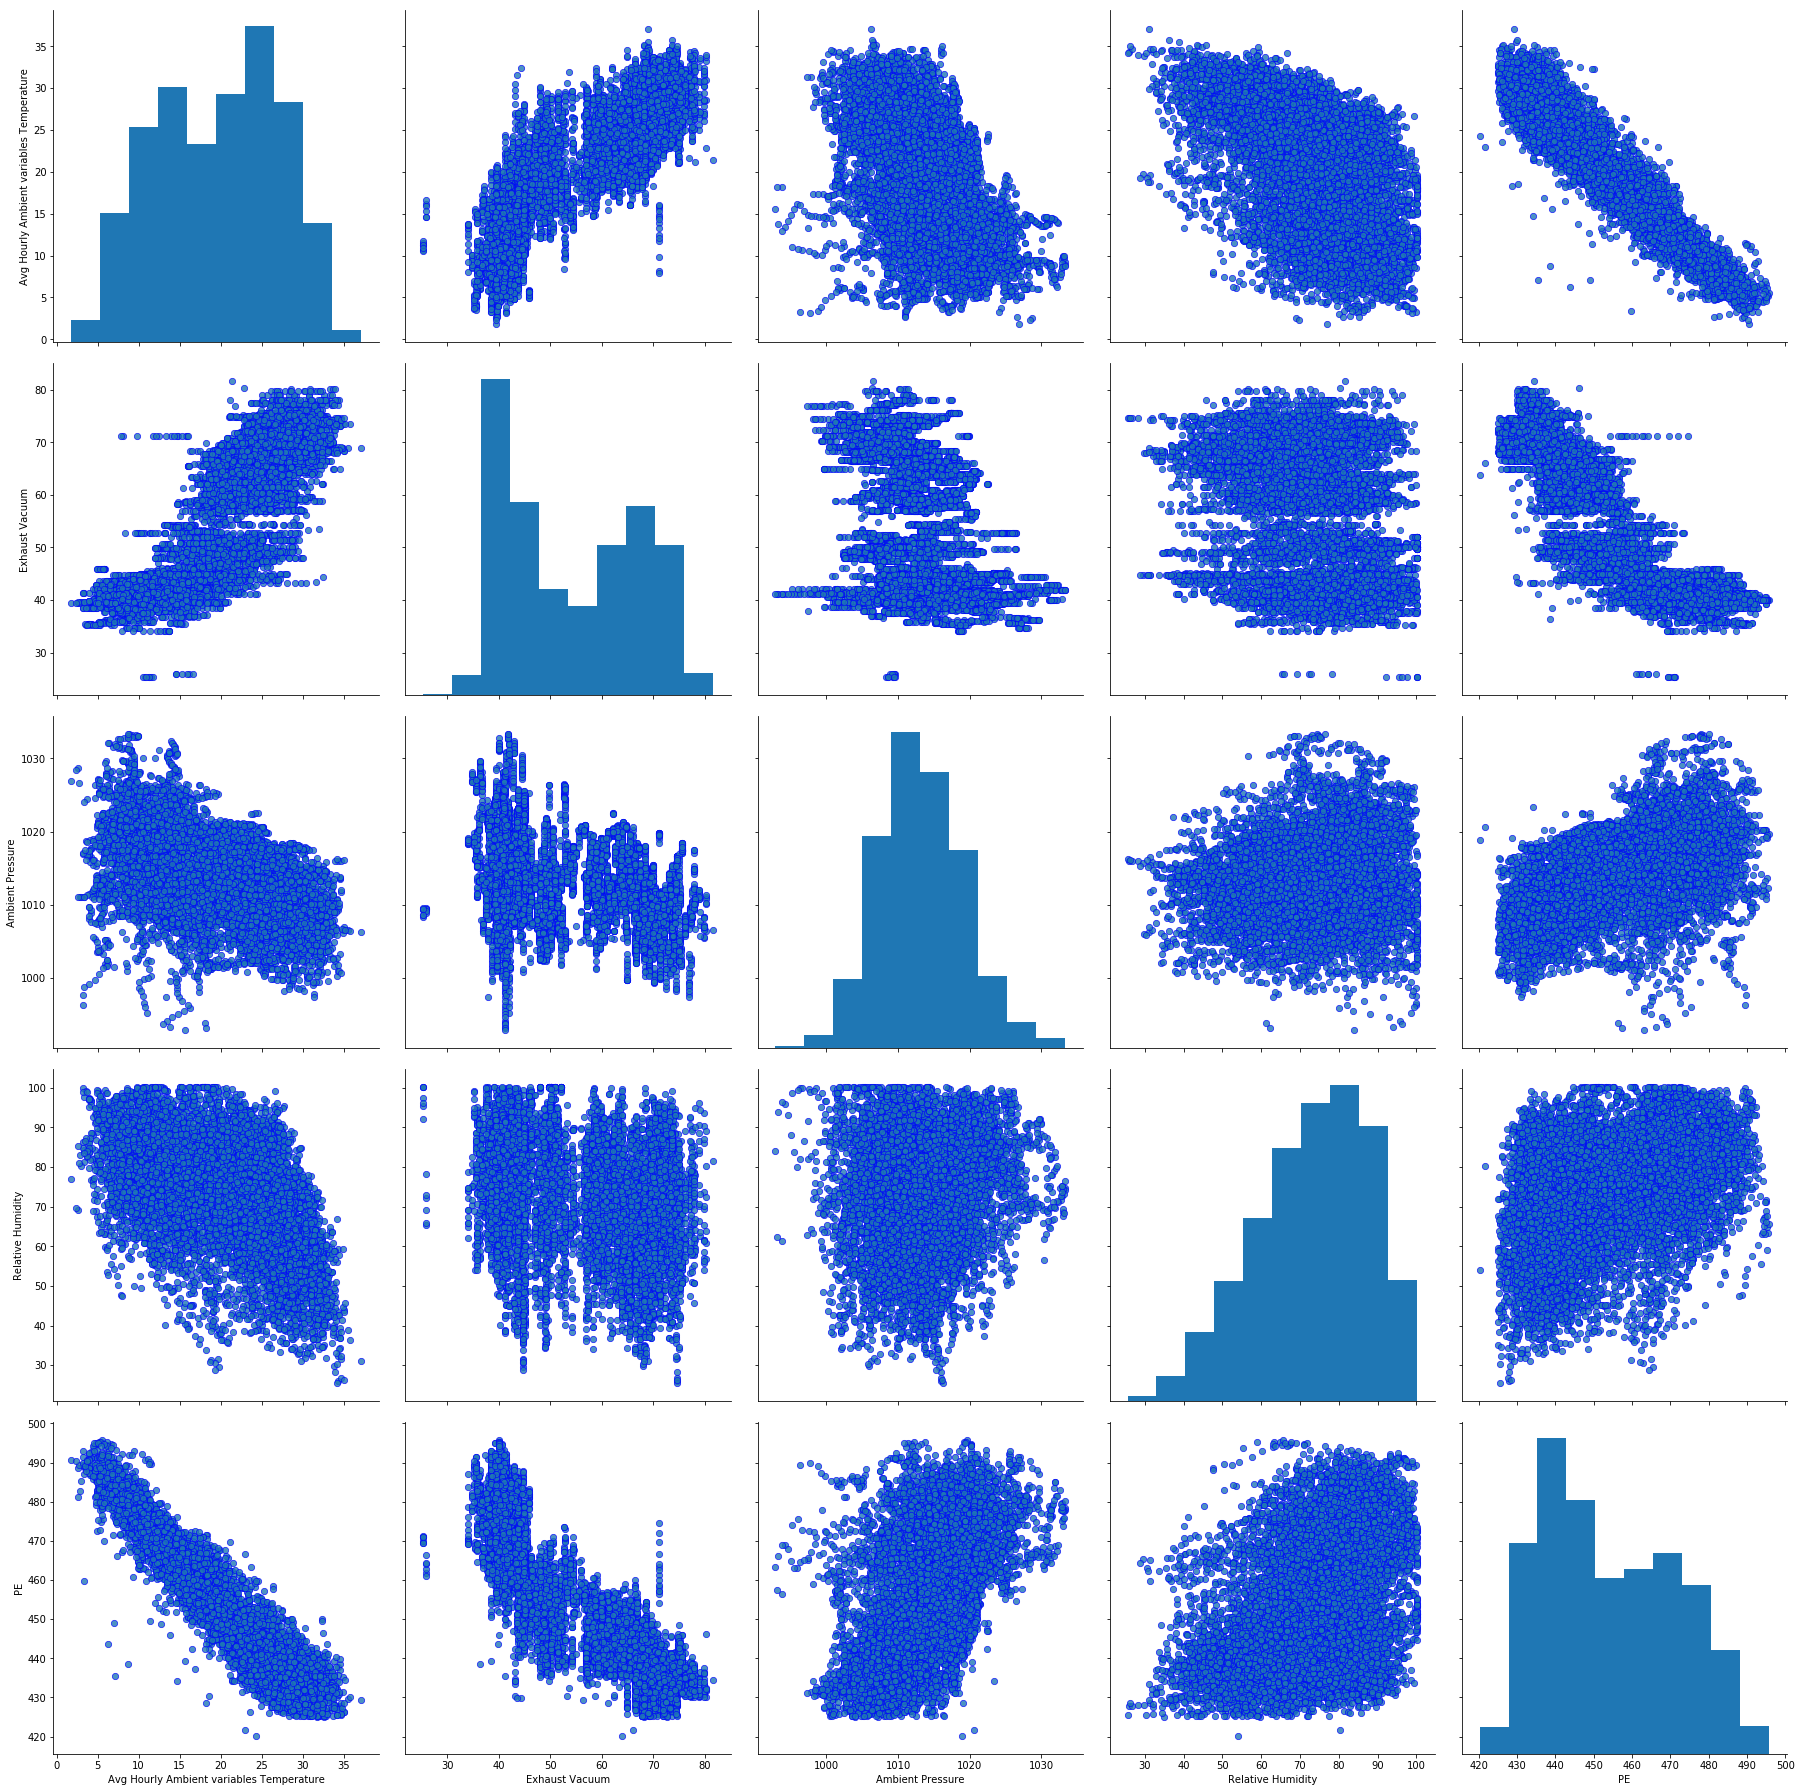

In [5]:
print("\033[1m")
print("\n \033[1m Pairwise scatterplot depecting the independent and dependent variables: \033[0m \n   " )
sns.pairplot(df1,plot_kws = {'alpha': 0.8, 's': 40, 'edgecolor': 'b'},
             height = 5)
print("\033[0m")

###### Mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset

In [6]:

summary = np.array([
['Variable','Median','Mean','Range','First Quartile','Third Quartile','Interquartile'],
['AT', np.percentile(df['AT'],50),np.mean(df['AT']),(max(df['AT'])-min(df['AT'])),np.percentile(df['AT'],25),np.percentile(df['AT'],75),((np.percentile(df['AT'],75))-(np.percentile(df['AT'],25)))],
['V', np.percentile(df['V'],50),np.mean(df['V']),(max(df['V'])-min(df['V'])),np.percentile(df['V'],25),np.percentile(df['V'],75),((np.percentile(df['V'],75))-(np.percentile(df['V'],25)))],
['AP', np.percentile(df['AP'],50),np.mean(df['AP']),(max(df['AP'])-min(df['AP'])),np.percentile(df['AP'],25),np.percentile(df['AP'],75),((np.percentile(df['AP'],75))-(np.percentile(df['AP'],25)))],
['RH', np.percentile(df['RH'],50),np.mean(df['RH']),(max(df['RH'])-min(df['RH'])),np.percentile(df['RH'],25),np.percentile(df['RH'],75),((np.percentile(df['RH'],75))-(np.percentile(df['RH'],25)))],
['PE', np.percentile(df['PE'],50),np.mean(df['PE']),(max(df['PE'])-min(df['PE'])),np.percentile(df['PE'],25),np.percentile(df['PE'],75),((np.percentile(df['PE'],75))-(np.percentile(df['PE'],25)))]
])

print("\n \033[1m Table summarizing the mean,median, range,first,third and interquartile ranges: \033[0m \n   " )
print (pd.DataFrame(data=summary[1:,0:],columns=summary[0,0:]))


  Table summarizing the mean,median, range,first,third and interquartile ranges:  
   
  Variable              Median                Mean              Range  \
0       AT              20.345   19.65123118729102               35.3   
1        V               52.08   54.30580372073601               56.2   
2       AP             1012.94  1013.2590781772603  40.40999999999997   
3       RH              74.975   73.30897784280926               74.6   
4       PE  451.54999999999995   454.3650094063554               75.5   

  First Quartile Third Quartile       Interquartile  
0          13.51          25.72  12.209999999999999  
1          41.74          66.54  24.800000000000004  
2         1009.1        1017.26   8.159999999999968  
3        63.3275          84.83  21.502499999999998  
4         439.75         468.43  28.680000000000007  


The above table represents the median, mean, range,First Quartile, Third quartile and Interquartile of all columns(dependent and independent variables) in the data set.

In [7]:
df.describe() ## further details

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


###### Fitting linear regression model to predict the response

In [8]:
def linear_regression(X,y) :
    lm_1=LinearRegression(fit_intercept=True)
    lm_1.fit(X,y)
    print("\n \n Intercept = {}".format(lm_1.intercept_))
    print("\n coefficients :{}".format(lm_1.coef_))
    pred_1 = lm_1.predict(X)
    plt.scatter(X,y,marker='o',edgecolors='black',color='pink')
    plt.title('ScatterPlot of test data with predictor {} and output' .format(df.columns[i]))
    plt.xlabel('{}'.format(df.columns[i]),fontsize=12)
    plt.ylabel('{}'.format(df.columns[len(df.columns)-1]),fontsize=12)
    plt.plot(X,pred_1,color="blue")
    plt.show()
    return(lm_1.coef_)
def linear_regression_stats(X,y) : 
    X = sm.add_constant(X)
    model = sm.OLS(y,X).fit()
    #model = sm.OLS(formual ='PE ~ AT',data=df).fit()
    #pred_2 = model.predict(X_test)
    print("\n \033[1m  ")
    print("Simple Linear regression model stats ")
    print("\033[0m \n   " )
    print(model.summary())
    coeff_uni= []
    coeff_uni.append(np.array(model.params))
    print("\n \033[1m  ")
    print("coefficients of univariate linear regression " .format(coeff_uni))
    print("\033[0m \n   " )

(9568, 1)

 
 Intercept = [497.03411989]

 coefficients :[[-2.17131996]]


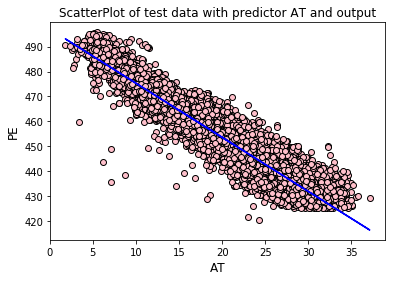


   
Simple Linear regression model stats 
 
   
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:26   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

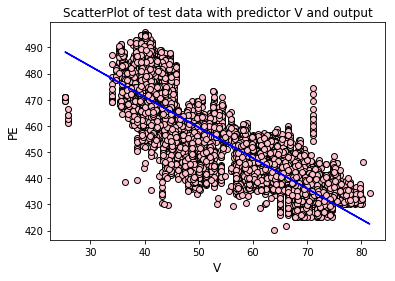


   
Simple Linear regression model stats 
 
   
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:26   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

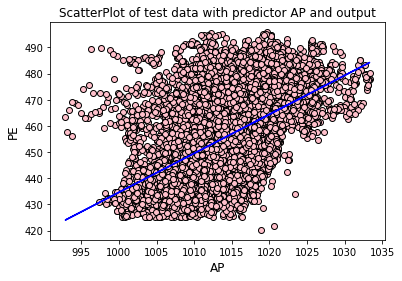


   
Simple Linear regression model stats 
 
   
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:26   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

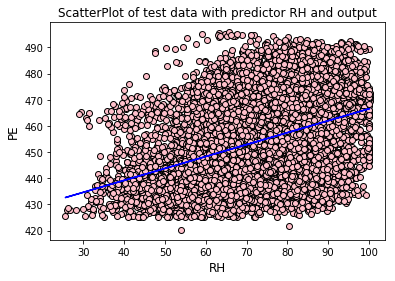


   
Simple Linear regression model stats 
 
   
                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
con

In [9]:
coeff_uni = []

for i in range(0,len(df.columns)-1,1):
    X_1 = pd.DataFrame(df.iloc[:,i].values.reshape(-1,1))
    y_1 = pd.DataFrame(df.iloc[:,-1].values.reshape(-1,1))
    print(X_1.shape)
    coeff_uni.append(linear_regression(X_1,y_1))### function call
    linear_regression_stats(X_1,y_1)
    print("\n======================================================\n")
    print("\n======================================================\n")
    print("\n======================================================\n")


A predictor with lower p-value (ideally <0.05) indicates that the null hypothesis can be rejected. A predictor that has low p-value is likely to be more significant and varying such predictor corresponds to bigger changes in output. In the above outcome, all of the predictors are significant with respect to response variable as all have a p-value lower than 0.05 showing a statistically significant association between the predictor and the response.

In [10]:
#def outliers()
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print("\n \033[1m  ")
print("Interquartile range of all predictors : ")
print("\033[0m \n   " )
print(IQR)
print("\n \033[1m  ")
print("Outliers in the data : (True value) ")
print("\033[0m \n   " )
print ((df < (Q1 - 1.5* IQR)) | (df >(Q3 + 1.5* IQR)))## true values in the data are outliers


   
Interquartile range of all predictors : 
 
   
AT    12.2100
V     24.8000
AP     8.1600
RH    21.5025
PE    28.6800
dtype: float64

   
Outliers in the data : (True value) 
 
   
         AT      V     AP     RH     PE
0     False  False  False  False  False
1     False  False  False  False  False
2     False  False  False  False  False
3     False  False  False  False  False
4     False  False  False  False  False
5     False  False  False  False  False
6     False  False  False  False  False
7     False  False  False  False  False
8     False  False  False  False  False
9     False  False  False  False  False
10    False  False  False  False  False
11    False  False  False  False  False
12    False  False  False  False  False
13    False  False  False  False  False
14    False  False  False  False  False
15    False  False  False  False  False
16    False  False  False  False  False
17    False  False  False  False  False
18    False  False  False  False  False
19    False  Fa

Above "True" values indicate the outliers in the dataset. Also from the graph it is evident of the outliers having higher deviations . All the values listed "True" as outliers are at a distance farther than Q1-1.5IQR or Q3 + 1.5IQR.

###### Fitting a multiple regression model to predict the response using all of the predictors

In [11]:
X=df[['AT','V','AP','RH']]
y= df['PE']
model = sm.OLS(y,X).fit()
#model_hlm = sm.OLS(y_train_h_lm,X_train_h_lm).fit()
print(model.summary())
predict_1=model.predict(X)
#print(predict_1)
print("\n \033[1m  ")
print("Mean Square Error for all predictors :")
print("\033[0m   " )
print(eval_measures.mse(y, predict_1, axis=0))
coeff_multi = []
coeff_multi = np.array(model.params)
#len(model.fittedvalues)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.939e+07
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                -29068.
No. Observations:                9568   AIC:                         5.814e+04
Df Residuals:                    9564   BIC:                         5.817e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.6781      0.015   -109.169      0.0

All of the predictors show a statistical significance with respect to the output variable. Hence we can reject the null hypothesis for all the variables. The output PE has a decent linear correlation with AT,V,AP and RH.


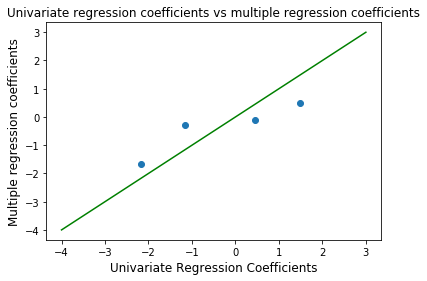

In [12]:

plt.scatter(coeff_uni,coeff_multi)
plt.title('Univariate regression coefficients vs multiple regression coefficients' )
plt.xlabel('Univariate Regression Coefficients',fontsize=12)
plt.ylabel('Multiple regression coefficients',fontsize=12)
plt.plot([-4,3], [-4,3],color='g')


Above graph indicates the univariate regression coefficient on X axis to the multivariate regression coefficients on y axis and the points indicate corresponding predictors.  There seems to a be a reasonable correlation between the coefficients of individual and multiple regressions. 

###### Finding nonlinear association between any of the predictors and the response using a model of the form Y = β0 + β1X + β2X2 + β3X3 + e

In [13]:
result_AT = smf.ols(formula ='PE ~ AT+ AT**2 + AT**3',data=df).fit() #I(AT**2) + I(AT**3)
print("\n \033[1m  ")
print("Cubic Non-linear regression model stats for AT: ")
print("\033[0m \n   " )
print(result_AT.summary())

result_V = smf.ols(formula ='PE ~ V+ V**2 + V**3',data=df).fit() #I(AT**2) + I(AT**3)
print("\n \033[1m  ")
print("Cubic Non-linear regression model stats for V : ")
print("\033[0m \n   " )
print(result_V.summary())

result_AP = smf.ols(formula ='PE ~ AP+ AP**2 + AP**3',data=df).fit() #I(AT**2) + I(AT**3)
print("\n \033[1m  ")
print("Cubic Non-linear regression model stats for AP : ")
print("\033[0m \n   " )
print(result_AP.summary())

result_RH = smf.ols(formula ='PE ~ RH+ RH**2 + RH**3',data=df).fit() #I(AT**2) + I(AT**3)
print("\n \033[1m  ")
print("Cubic Non-linear regression model stats for RH : ")
print("\033[0m \n   " )
print(result_RH.summary())



   
Cubic Non-linear regression model stats for AT: 
 
   
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

For each of the predictors, we can see a cubic nonlinear association with response variable as evident from the obtained values that are lower than 0.05. 

###### Finding association of interactions of predictors with the response

In [14]:
result_pairwise = smf.ols(formula ='PE ~ AT*V + AT*AP + AT*RH + V*AP + V*RH +AP*RH + AT + V+ AP+RH ',data=df).fit() #I(AT**2) + I(AT**3)
print("\n \033[1m  ")
print("Linear regression with pairwise interaction terms : ")
print("\033[0m \n   " )
print(result_pairwise.summary())




   
Linear regression with pairwise interaction terms : 
 
   
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

When considered pairwise,  V:RH and AT show a higher p value (>0.05) showing a statistically insignificant relationship when considered in association with each other. Rest show a significant relation.

In [15]:
X_1 = df[['AT', 'V', 'AP', 'RH']]
y_1 = df['PE']
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1,y_1,test_size=0.3)
X_1 = sm.add_constant(X_1)
model_1 = sm.OLS(y_train_1,X_train_1).fit()
#model_1 = sm.OLS(y_train_1,X_train_1).fit()
print("\n \033[1m  ")
print("Simple Linear Regression with model trained on 70% train data: ")
print("\033[0m \n   " )
print(model_1.summary())
predict_1=model_1.predict(X_test_1)
print("\n MSE for all predictors(test data) :")
print(eval_measures.mse(y_test_1, predict_1, axis=0))
predict_1=model_1.predict(X_train_1)
print("\n MSE for all predictors(train data) :")
print(eval_measures.mse(y_train_1, predict_1, axis=0))


   
Simple Linear Regression with model trained on 70% train data: 
 
   
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.358e+07
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                -20345.
No. Observations:                6697   AIC:                         4.070e+04
Df Residuals:                    6693   BIC:                         4.072e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

Above data indicates is for the multiple linear regression model trained on 70% of the data and tested on the rest.
The obtained p values show a significant linear relationship between the predictors and the response, rejecting the null hypothesis. The mean square error using test data is 25.96 and when tested on train data it is 25.30

In [16]:
result_1 = smf.ols(formula ='PE ~ AT+V+RH+AP + AP*V+AP*RH+AP*AT + RH*V+RH*AT + V*AT + AT*AT + V*V + AP*AP + RH*RH ',data=df).fit() #I(AT**2) + I(AT**3)
print("\n \033[1m  ")
print("Multiple Linear Regression with all association and interactions and quadratic non-linearities:  ")
print("\033[0m \n   " )
print(result_1.summary())
predict_2 = result_1.predict(X_test_1)
print(" \n MSE for all predictors(test data) ")
print(eval_measures.mse(y_test_1, predict_2, axis=0))

#predict_2=result_1.predict(X_test_1)
#print("\n MSE for all predictors(test data) :")
#print(eval_measures.mse(y_test_1, predict_2, axis=0))
predict_3=result_1.predict(X_train_1)
print("\n MSE for all predictors(train data) :")
print(eval_measures.mse(y_train_1, predict_3, axis=0))


   
Multiple Linear Regression with all association and interactions and quadratic non-linearities:  
 
   
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------

When considered with possible interaction terms or nonlinear associations between the predictors and response, AT, RH:V show the least statistical significance. Hence, trying to test the outcome while removing the least significant combinations, below is the result.

In [17]:
#result_3 = smf.ols(formula ='PE ~ AT+V+RH+AP + AP*V+AP*RH+AP*AT + RH*V+RH*AT + V*AT + AT*AT + V*V + AP*AP + RH*RH  ',data=df).fit() #I(AT**2) + I(AT**3)
result_3 = smf.ols(formula ='PE ~ AT+V+RH+AP + AP*V+AP*RH+AP*AT +RH*AT + V*AT + AT*AT + V*V + AP*AP + RH*RH  ',data=df).fit()
print("\n \033[1m  ")
print("Multiple Linear Regression with all association and interactions and quadratic non-linearities - Removed the insignificant terms:  ")
print("\033[0m \n   " )
print(result_3.summary())

predict_3 = result_3.predict(X_test_1)
print(" \n MSE for all predictors(test data) ")
print(eval_measures.mse(y_test_1, predict_3, axis=0))

#predict_2=result_1.predict(X_test_1)
#print("\n MSE for all predictors(test data) :")
#print(eval_measures.mse(y_test_1, predict_2, axis=0))
predict_4=result_3.predict(X_train_1)
print("\n MSE for all predictors(train data) :")
print(eval_measures.mse(y_train_1, predict_4, axis=0))


   
Multiple Linear Regression with all association and interactions and quadratic non-linearities - Removed the insignificant terms:  
 
   
                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        23:22:27   Log-Likelihood:                -27550.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9558   BIC:                         5.519e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025 

Above result shows the outcome upon removing the least significant interactions RH:V. Observation is that removal of the next least significant predictor AT, results in a larger p value for other input variables.

###  KNN Regression

In [18]:
### raw features/unnormalized data - test data ###

error_rate_i = []
k_test_i = []
pred_test_i = []
root_mean_error_1 = []
best_error_i = 1000
for i in range(1,101,+1):
    #print(i)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_1,y_train_1)
    pred_i = knn.predict(X_test_1)
    #pred_test_i.append(pred_i)
    error_rate_i.append(np.mean(pred_i != y_test_1))
    k_test_i.append(i)
    root_mean_error_1.append(mean_squared_error(y_test_1,pred_i))
    if  best_error_i  >  min(root_mean_error_1):
        best_error_i = min(error_rate_i)
        best_k_i = i
        best_mse_1 = root_mean_error_1[i-1]
    #print(error_rate_i[i-1])
print("\033[1m")
print ("KNN- Unnormalized Data ( Tested on test data)")
print("\033[0m")

print ("Best error rate = {}". format(best_error_i))
print ("Number of neighbors = {}". format(best_k_i))
print ("Mean Square Error  = {}". format(best_mse_1))


KNN- Unnormalized Data ( Tested on test data)

Best error rate = 0.9930337861372344
Number of neighbors = 1
Mean Square Error  = 21.289875618251482


In [19]:
### raw features/unnormalized data - train data ###

error_rate_k = []
k_test_k = []
pred_test_k = []
root_mean_error_k = []
best_error_k = 1000
for i in range(1,101,+1):
    #print(i)
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_1,y_train_1)
    pred_k = knn.predict(X_train_1)
    #pred_test_k.append(pred_k)
    error_rate_k.append(np.mean(pred_k != y_train_1))
    k_test_k.append(i)
    root_mean_error_k.append(mean_squared_error(y_train_1,pred_k))
    if  best_error_k  >  min(root_mean_error_k):
        best_error_k = min(error_rate_k)
        best_k_k = i
        best_mse_k = root_mean_error_k[i-1]
    #print(error_rate_k[i-1])
print("\033[1m")
print ("KNN- Unnormalized Data ( Tested on train data)")
print("\033[0m")


print ("Best error rate = {}". format(best_error_k))
print ("Number of neighbors = {}". format(best_k_k))
print ("Mean Square Error  = {}". format(best_mse_k))



KNN- Unnormalized Data ( Tested on train data)

Best error rate = 0.0
Number of neighbors = 1
Mean Square Error  = 0.0


In [20]:
### with normalized data - test data ###

X_n = df[['AT', 'V', 'AP', 'RH']]
y_n = df['PE']
X_norm = preprocessing.normalize(X_n)
X_train_n,X_test_n,y_train_n,y_test_n = train_test_split(X_norm,y_n,test_size=0.7)
error_rate_n = []
k_test_n = []
pred_test_n = []
root_mean_error_n =[]
best_error_n = 10000
for i in range(1,101,+1):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_n,y_train_n)
    pred_i = knn.predict(X_test_n)
    pred_test_n.append(pred_i)
    error_rate_n.append(np.mean(pred_i != y_test_n))
    k_test_n.append(i)
    root_mean_error_n.append(mean_squared_error(y_test_n,pred_i))
    if  best_error_n  >  min(root_mean_error_n):
        best_error_n = min(error_rate_n)
        best_k_n = i
        best_mse_n = root_mean_error_n[i-1]
print("\033[1m")
print ("KNN- normalized Data ( Tested on test data)")
print("\033[0m")


print ("Best error rate = {}". format(best_error_n))
print ("Number of neighbors = {}". format(best_k_n))
print ("Mean Square Error  = {}". format(best_mse_n))


KNN- normalized Data ( Tested on test data)

Best error rate = 0.9964168408480143
Number of neighbors = 1
Mean Square Error  = 31.191974320692736


In [21]:
### with normalized data - train data ###
error_rate_nt = []
k_test_nt = []
pred_test_nt = []
root_mean_error_nt =[]
best_error_nt = 10000
for i in range(1,101,+1):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_n,y_train_n)
    pred_it = knn.predict(X_train_n)
    pred_test_nt.append(pred_it)
    error_rate_nt.append(np.mean(pred_it != y_train_n))
    k_test_nt.append(i)
    root_mean_error_nt.append(mean_squared_error(y_train_n,pred_it))
    if  best_error_nt  >  min(root_mean_error_nt):
        best_error_nt = min(error_rate_nt)
        best_k_n = i
        best_mse_nt = root_mean_error_nt[i-1]
print("\033[1m")
print ("KNN- normalized Data ( Tested on train data)")
print("\033[0m")

print ("Best error rate = {}". format(best_error_n))
print ("Number of neighbors = {}". format(best_k_n))
print ("Mean Square Error  = {}". format(best_mse_nt))


KNN- normalized Data ( Tested on train data)

Best error rate = 0.9964168408480143
Number of neighbors = 1
Mean Square Error  = 0.0


In [22]:
### with normalized data - train data

X_n_t = df[['AT', 'V', 'AP', 'RH']]
y_n_t = df['PE']
X_n_torm = preprocessing.normalize(X_n_t)
X_train_n_t,X_test_n_t,y_train_n_t,y_test_n_t = train_test_split(X_n_torm,y_n_t,test_size=0.3)
error_rate_n_t = []
k_test_n_t = []
pred_test_n_t = []
root_mean_error_n_t =[]
best_error_n_t = 10000
for i in range(1,101,+1):
    
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train_n_t,y_train_n_t)
    pred_i = knn.predict(X_train_n_t)
    pred_test_n_t.append(pred_i)
    error_rate_n_t.append(np.mean(pred_i != y_train_n_t))
    k_test_n_t.append(i)
    root_mean_error_n_t.append(mean_squared_error(y_train_n_t,pred_i))
    if  best_error_n_t  >  min(root_mean_error_n_t):
        best_error_n_t = min(root_mean_error_n_t)
        best_k_n_t = i
        best_mse_nt = root_mean_error_n_t[i-1]
print("\033[1m")
print ("Applying K-Nearest-Neighbors Regression algorithm:")
print("\033[0m")

print ("Best error rate = {}". format(best_error_n_t))
print ("Number of neighbors = {}". format(best_k_n_t))
print ("Mean Square Error  = {}". format(best_mse_nt))


Applying K-Nearest-Neighbors Regression algorithm:

Best error rate = 0.0
Number of neighbors = 1
Mean Square Error  = 0.0


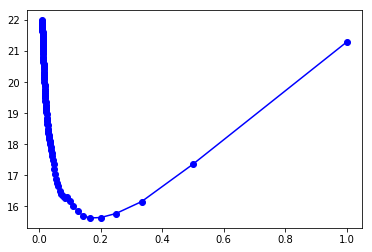

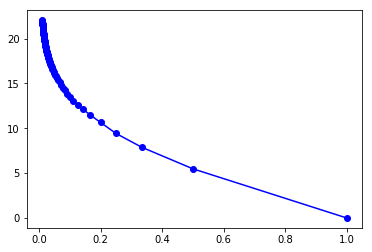

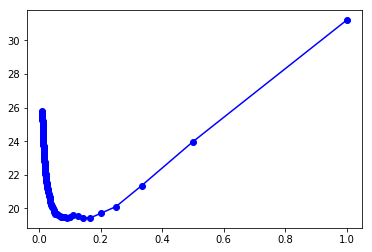

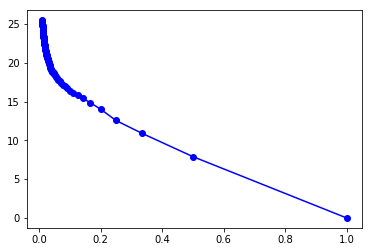

In [23]:
inv_k = []
for k in range (1,101,1):
    inv_k.append(1/k)
plt.plot(inv_k,root_mean_error_1,marker='o',color='b')
plt.show()
plt.plot(inv_k,root_mean_error_k,marker='o',color='b')
plt.show()
plt.plot(inv_k,root_mean_error_n,marker='o',color='b')
plt.show()
plt.plot(inv_k,root_mean_error_nt,marker='o',color='b')
plt.show()

###### Comparing the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis

Considering all the predictors, when multiple linear regression is applied, Mean-Squared-Error obtained for test data is = 25.021153096737642
Considering all the interaction terms and quadratic non-linearities , Mean-Squared-Error obtained for test data is = 18.205798770746473
Applying KNN for the given unnormalized data, MSE obtained = 23.462315778474395
Applying KNN for the given normalized data, MSE obtained =30.7

Of all the mean-squared-errors obtained, the  least is observed when interaction terms and quadratic non-linearities are considered and the value is 18.205798770746473.

Hence for the given data set, the optimal results are obtained by using Linear Regression model considering all pairwise interactions.

In [24]:
d = {'Obs': [1, 2,3,4,5,6], 'X1': [0,2,0,0,-1,1], 'X2':[3,0,1,1,0,1],'X3':[0,0,3,2,1,1],'Y':['Red','Red','Red','Green','Green','Red']}

d_inp = pd.DataFrame(data= d)
print(" Given data :")
d_inp

 Given data :


,Obs,X1,X2,X3,Y
0,1,0,3,0,Red
1,2,2,0,0,Red
2,3,0,1,3,Red
3,4,0,1,2,Green
4,5,-1,0,1,Green
5,6,1,1,1,Red


###### Computing the Euclidean distance between each observation and the test point, X1 = X2 = X3 = 0.

In [25]:
for p in range(0,len(d_inp),1):
    #a = (d_inp.at[p,'X1'],d_inp.at[p,'X2'],d_inp.at[p,'X3'])
    euc = np.sqrt(d_inp.at[p,'X1']**2 +d_inp.at[p,'X2']**2 +d_inp.at[p,'X3']**2)
    print(" Eucledian Distance for observation {} is {} " .format(p+1,euc))
    

 Eucledian Distance for observation 1 is 3.0 
 Eucledian Distance for observation 2 is 2.0 
 Eucledian Distance for observation 3 is 3.1622776601683795 
 Eucledian Distance for observation 4 is 2.23606797749979 
 Eucledian Distance for observation 5 is 1.4142135623730951 
 Eucledian Distance for observation 6 is 1.7320508075688772 


Upon sorting the above euclidean distance values, the test point belongs to class "Green" that is closest to the test point( with distance of 1.41)